# 1 - Define the problem / Questions

# 2. Data Collections -

# 3 - Data Cleaning  -
- Handle missing values

- Identify and remove duplicates

- handle outliers

- Transform the data into suitable format

# 4- EDA - Exploratory Data Analysis.

# 5- Data Visualization -

# 6 - Analyze the insights & Report


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [80]:
titanic = sns.load_dataset('titanic')

In [81]:
#initial data inspection

In [82]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [83]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [84]:
#As we seen , the data contain some missing values.
#so lets check the exact number

In [85]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


#insights

- age - 177 missing values - should be imputed based on pclass or sex - replace by mean or median

- embarked - 2 missing values - can be filled with mode

- deck - massive missing values - better to drop this column


# .fillna()

# .dropna - .dop()

In [86]:
#fill with median age based on pclass & sex

In [87]:
titanic['age'] =titanic.groupby(['pclass', 'sex'])['age'].transform(lambda x : x.fillna(x.median()))

In [88]:
titanic['age'].isnull().sum()

0

In [89]:
#replace embark with mode

In [90]:
titanic['embarked'].mode()[0]

'S'

In [91]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace = True)
#inplace = True is for permenent changes

<ipython-input-91-ad8b6e37aa77>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace = True)


In [92]:
titanic['embarked'].isnull().sum()

0

In [93]:
titanic.drop(columns=['deck'], inplace= True)

In [94]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [95]:
titanic.drop(columns=['who', 'embark_town', 'alive', 'adult_male'] , inplace= True)

In [96]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
alone,0


In [97]:
titanic.shape

(891, 10)

After dropping unwanted columns the titanic dataset now has 891 rows describe the 891 passenger details and 10 columns which shows the passenger features.

In [98]:
#lets check for statistical summery of the data -

In [99]:
titanic.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,646,491,537
mean,0.383838,2.308642,NaN,29.112424,0.523008,0.381594,32.204208,NaN,NaN,NaN
std,0.486592,0.836071,NaN,13.304424,1.102743,0.806057,49.693429,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,21.500000,0.000000,0.000000,7.910400,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,26.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,36.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN


 - survival rate only 38% while 62% did not survived

- half of the passenger were in third class

- most passenger were young adult - median age = 26 year

- must be outlier in age shown 80 year old also

- median fare 14.45 but max was 512.33 - it also may contain outliers

-most passenger travel alone

- most passenger embarked from 'S'

- most passenger class is Third class

In [100]:
titanic.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,True
887,False
888,False
889,False


In [101]:
titanic.duplicated().sum()

118

In [102]:
titanic.drop_duplicates(inplace= True)

In [103]:
titanic.duplicated().sum()

0

In [104]:
titanic.shape

(773, 10)

In [105]:
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
0,0,3,male,22.0,1,0,7.25,S,Third,False


In [106]:

#1. What is the overall distributon of passengers across diferent classes (Pclass)?

In [107]:
titanic['pclass'].unique()

array([3, 1, 2])

In [108]:
pclass_count=titanic['pclass'].value_counts().sort_index()

In [109]:
pclass_count

,count
pclass,
1,209
2,164
3,400


In [110]:
pclass_count.index


Index([1, 2, 3], dtype='int64', name='pclass')

In [111]:
pclass_count.values


array([209, 164, 400])

<ipython-input-112-4b42c520f9bb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pclass_count.index,y=pclass_count.values,palette='pastel')


Text(0.5, 1.0, 'distribution of passenger  in different class')

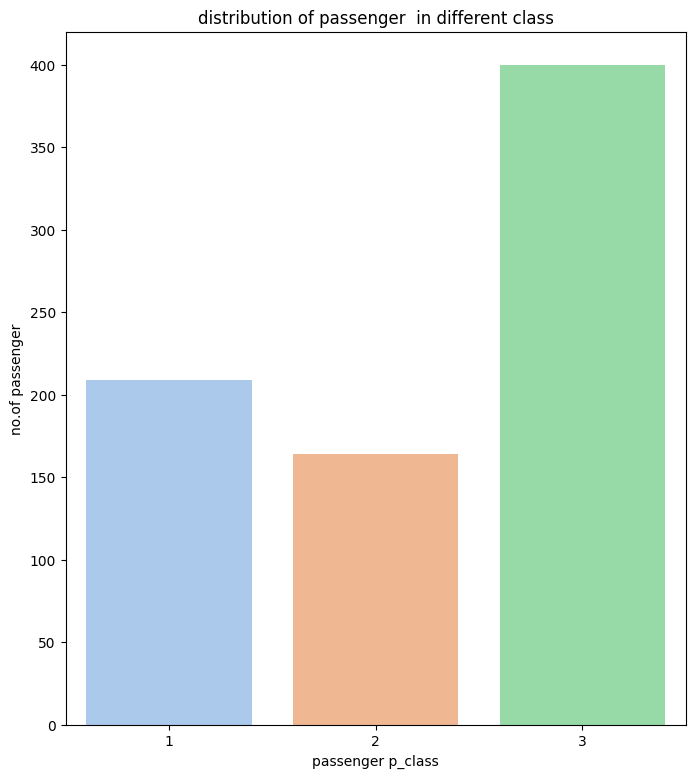

In [112]:
plt.figure(figsize=(8,9))
sns.barplot(x=pclass_count.index,y=pclass_count.values,palette='pastel')
plt.xlabel('passenger p_class')
plt.ylabel('no.of passenger')
plt.title('distribution of passenger  in different class')

#insights from pclass distrubution

- Majority of the passenger travelled in pclass3,
indicating it was the mostt affordble and popular

- pclass 1 had the least number of passenger ,suggesting that fewer peoople could luxury tavel

- pclass 2 - had moderatee number of passenger showing a middle class passenger

In [113]:
#How is the age of passengers distributed?

Text(0.5, 1.0, 'distribution of age on titanic')

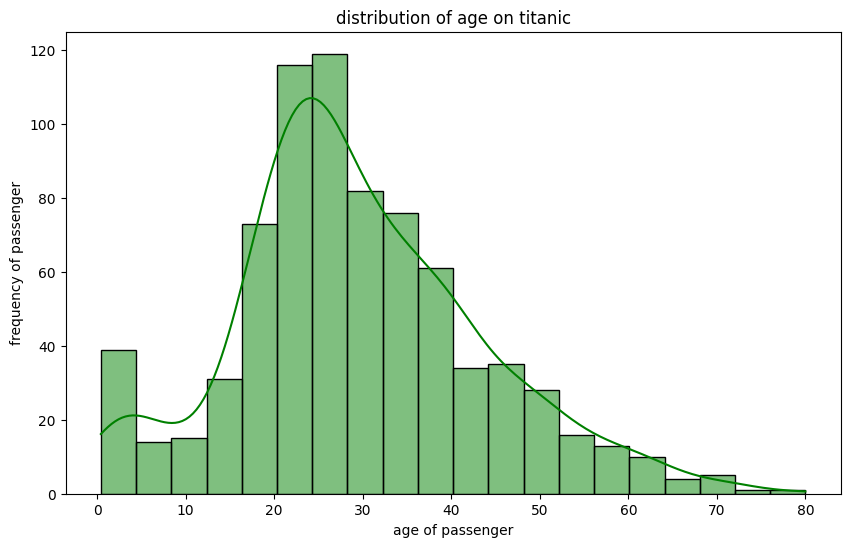

In [114]:
plt.figure(figsize=(10,6))
sns.histplot(data=titanic,x='age',bins=20,kde=True,color='g')
plt.xlabel('age of passenger')
plt.ylabel('frequency of passenger')
plt.title('distribution of age on titanic')


# insights  from age Distribution
- the peak age group is 20-30 yr old . indiacaring many young adult travelled.

- there are fewer children (age < 10) and elederly (age>60) on board

- the age distribution has a long tailon the right ,indicating some passengers were much older ( may be outlier ),not suppoesed to be on the board

In [115]:
#What is the distributon of passengers based on Sex?

In [116]:
titanic['sex'].unique()

array(['male', 'female'], dtype=object)

In [117]:
gender_count=titanic['sex'].value_counts()

In [118]:
gender_count


,count
sex,
male,482
female,291


<ipython-input-119-3639a761cdeb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_count.index,y=gender_count.values,palette='pastel')


Text(0.5, 1.0, 'distribution of passenger  in different class')

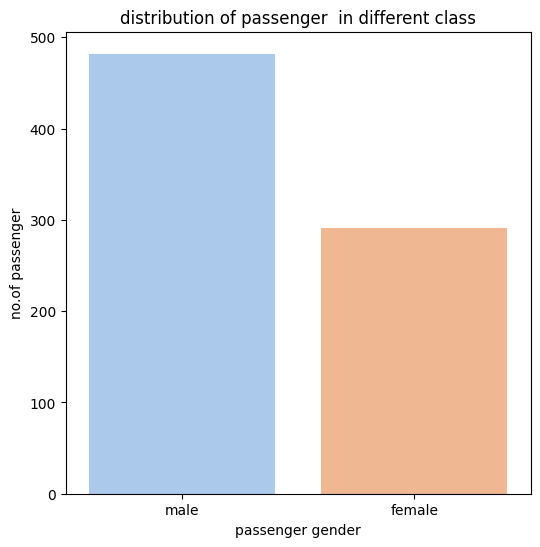

In [119]:
plt.figure(figsize=(6,6))
sns.barplot(x=gender_count.index,y=gender_count.values,palette='pastel')
plt.xlabel('passenger gender')
plt.ylabel('no.of passenger')
plt.title('distribution of passenger  in different class')


#Insights from Gender distribition

- The dataset shows more male passenger than female

- Since the titanic was a mix emigrant ,workerss,healthy workers men

In [120]:
#4 How many passengers embarked from each port (Embarked)?

In [121]:
titanic['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [122]:
#S - Southhampton,C-- cheborg,Q-queenstown

In [123]:
embarked_count=titanic['embarked'].value_counts()

In [124]:
embarked_count

,count
embarked,
S,562
C,153
Q,58


<ipython-input-125-0f0a808fd73e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=embarked_count.index,y=embarked_count.values,palette='hls')


Text(0.5, 1.0, 'embarked town distribution')

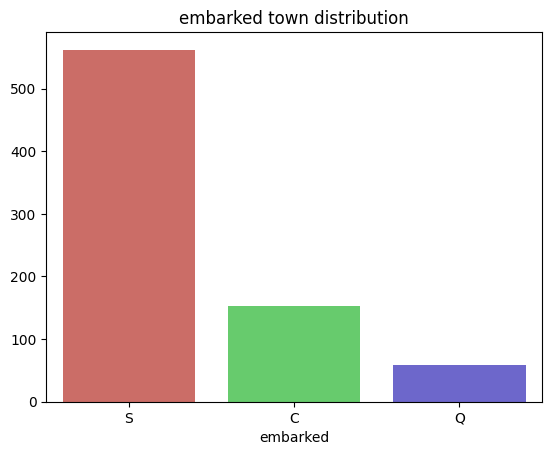

In [125]:
sns.barplot(x=embarked_count.index,y=embarked_count.values,palette='hls')
plt.title('embarked town distribution')

#insights from Embarked Distrubution

-Majority of pasenger is travelledfrom Southhampton

- Moderate passenger embarked fronm chebourg

-Q queentown had the least no of passenger

In [126]:
#5. What is the survival rate overall, and how does it vary by Pclass?

In [127]:
overall_survival_rate=titanic['survived'].mean()*100

In [128]:
overall_survival_rate

41.52652005174644

In [129]:
survival_by_pclass=titanic.groupby('pclass')['survived'].mean()*100

In [130]:
survival_by_pclass

,survived
pclass,
1,64.114833
2,50.609756
3,26.000000


<ipython-input-131-2e8ba6aab6be>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_pclass.index,y=survival_by_pclass.values,palette='Set1')


Text(0.5, 1.0, 'Survival rate by pclass distribution')

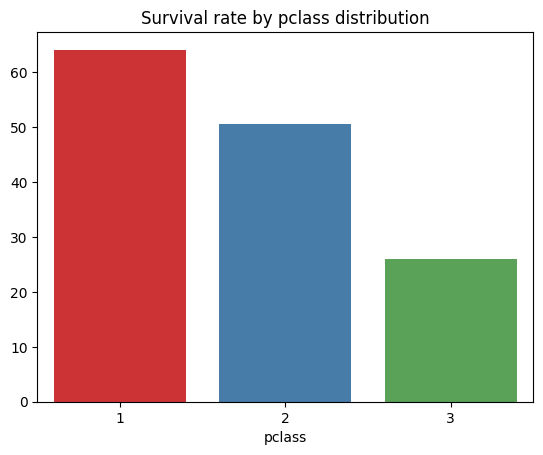

In [131]:
sns.barplot(x=survival_by_pclass.index,y=survival_by_pclass.values,palette='Set1')
plt.title('Survival rate by pclass distribution')

#
Insight only 41% passenger is survived ,indicating high facility rate

In [132]:
#what there any relationship between the number of siblings/spouses aboard (SibSp) and survival?


In [133]:
survival_sibsp=titanic.groupby('sibsp')['survived'].mean()*100

In [134]:
survival_sibsp

,survived
sibsp,
0,38.658777
1,53.000000
2,44.444444
3,28.571429
4,16.666667
5,0.000000
8,0.000000


<ipython-input-135-e25522fedef5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_sibsp.index,y=survival_sibsp.values,palette='viridis')


Text(0.5, 1.0, 'survival rate by sibsp')

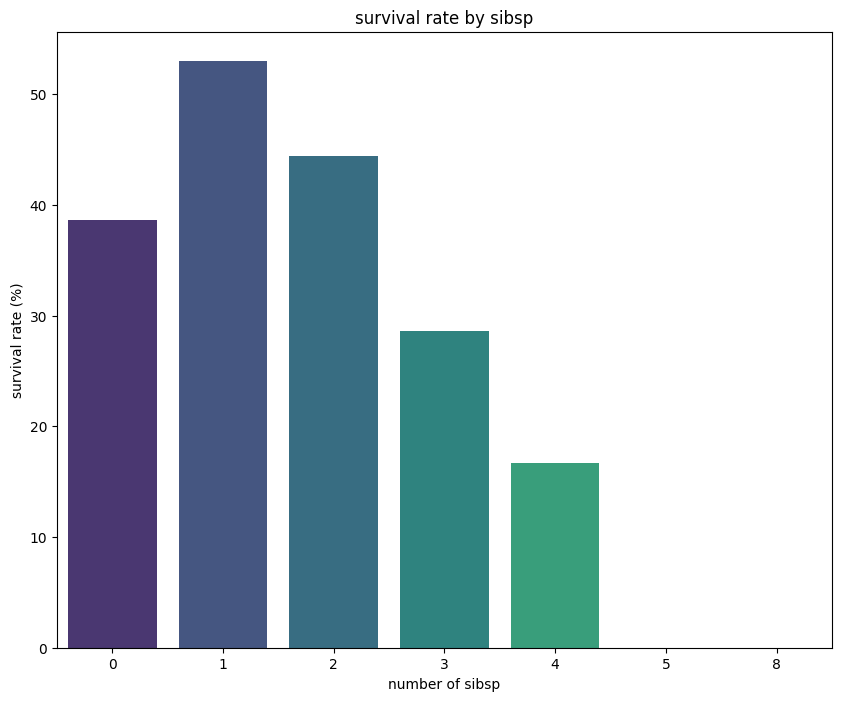

In [135]:
plt.figure(figsize=(10,8))
sns.barplot(x=survival_sibsp.index,y=survival_sibsp.values,palette='viridis')
plt.xlabel('number of sibsp')
plt.ylabel('survival rate (%)')
plt.title('survival rate by sibsp')

In [136]:

#  How does the number of parents/children aboard (Parch) affect survival

In [137]:
survival_by_parch=titanic.groupby('parch')['survived'].mean()*100

In [138]:
survival_by_parch

,survived
parch,
0,37.609842
1,55.263158
2,53.333333
3,60.000000
4,0.000000
5,20.000000
6,0.000000


<ipython-input-139-e946cd48e846>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_parch.index,y=survival_by_parch.values,palette='pastel')


Text(0.5, 1.0, 'Surival rate by parch')

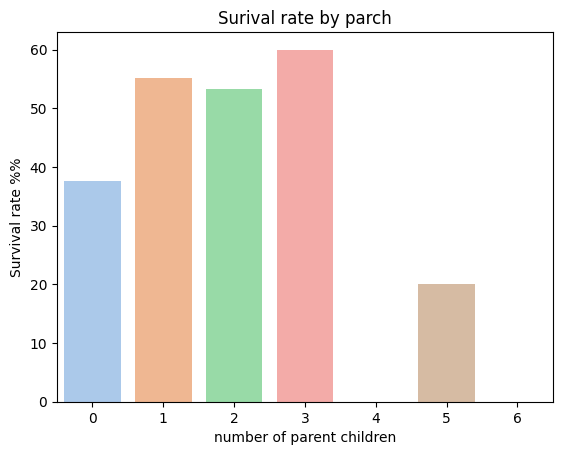

In [139]:

sns.barplot(x=survival_by_parch.index,y=survival_by_parch.values,palette='pastel')
plt.xlabel('number of parent children')
plt.ylabel('Survival rate %%')
plt.title('Surival rate by parch')

In [140]:
#How does the fare distribution vary across different passenger classes (Pclass)?



In [141]:
pclass=titanic.groupby('pclass')['fare'].describe()

In [142]:
pclass

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,209.0,86.000578,78.905683,0.0,32.3208,61.9792,106.425,512.3292
2,164.0,21.889279,13.498846,0.0,13.0000,18.7500,26.000,73.5000
3,400.0,13.733999,10.710465,0.0,7.7750,8.0500,15.900,69.5500


<ipython-input-143-a6d57003b70e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(titanic,x='pclass',y='fare',palette='Set1')


Text(0.5, 1.0, 'fare distribution accross passenger class')

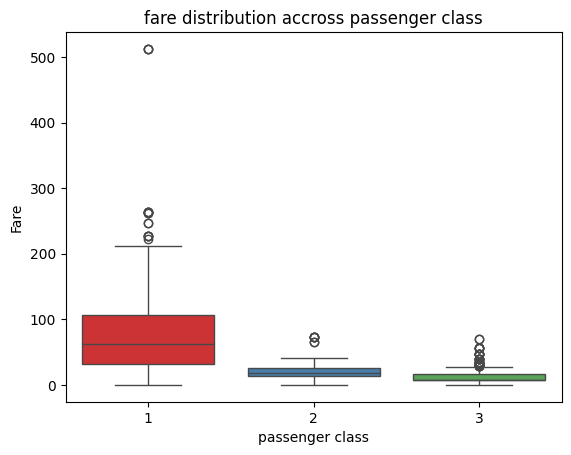

In [143]:
sns.boxplot(titanic,x='pclass',y='fare',palette='Set1')
plt.xlabel("passenger class")
plt.ylabel("Fare")
plt.title("fare distribution accross passenger class")

In [144]:
pclass=titanic.groupby('pclass')['fare'].describe()

In [145]:
pclass

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,209.0,86.000578,78.905683,0.0,32.3208,61.9792,106.425,512.3292
2,164.0,21.889279,13.498846,0.0,13.0000,18.7500,26.000,73.5000
3,400.0,13.733999,10.710465,0.0,7.7750,8.0500,15.900,69.5500


In [146]:
Q1 = titanic.groupby('pclass')['fare'].quantile(0.25)


Q2 = titanic.groupby('pclass')['fare'].quantile(0.50)


Q3 = titanic.groupby('pclass')['fare'].quantile(0.75)


IQR = Q3 - Q1


lower_bound  = Q1 - 1.5 * IQR


higher_bound = Q3 + 1.5 * IQR


higher_bound

,fare
pclass,
1,217.5813
2,45.5000
3,28.0875


Text(0.5, 1.0, 'Fare Distribution byb pclass')

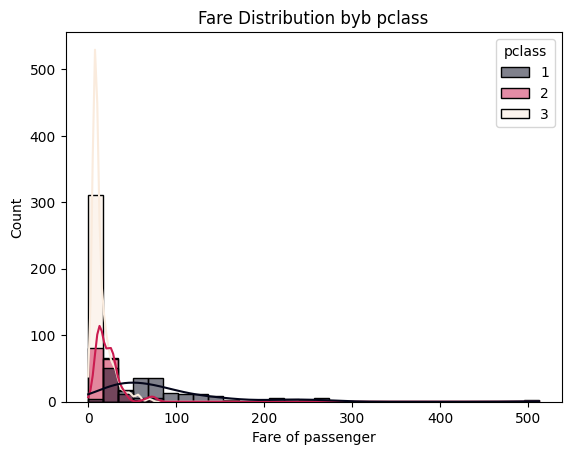

In [147]:
sns.histplot(data=titanic,x='fare',hue='pclass',kde=True,bins=30,palette='rocket')
plt.xlabel("Fare of passenger")

plt.title("Fare Distribution byb pclass")


In [148]:
Q1=titanic['fare'].quantile(0.25)

In [149]:
Q2=titanic['fare'].quantile(0.50)

In [150]:
Q3=titanic['fare'].quantile(0.75)

In [151]:
IQR=Q3-Q1

In [152]:
lower_bound= Q1-1.5*IQR
higher_bound=Q3+1.5*IQR

In [153]:
higher_bound

73.8625

In [1]:
titanic_clean = titanic[(titanic['fare']>=lower_bound) & (titanic['fare']<= higher_bound)]


NameError: name 'titanic' is not defined